# Optical Character Recognition (OCR) from Scratch

## Introduction
Here, we explore building a basic OCR system using convolutional neural networks. While commercial projects might leverage tools like Tesseract, building from scratch gives insights into the challenges and processes involved.

## Goals/Objectives
- Understand the intricacies of building an OCR model.
- Gain hands-on experience in handling image data and training image classification models.

## Dataset Overview
We'll use the [EMNIST ByClass dataset](https://www.nist.gov/itl/products-and-services/emnist-dataset) for this project. This dataset contains 814,255 characters, both digits and letters.


In [2]:
# install tensorflow dataset
!pip install tensorflow-datasets

import tensorflow_datasets as tfds

# Load the EMNIST dataset
(train_data, test_data), info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True  # provides tuple containing info about version, features, num_samples
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/697932 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/3.0.0.incomplete40SNOL/emnist-train.tfrecord*...:   0%|    …

Generating test examples...:   0%|          | 0/116323 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/3.0.0.incomplete40SNOL/emnist-test.tfrecord*...:   0%|     …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.0.0. Subsequent calls will reuse this data.


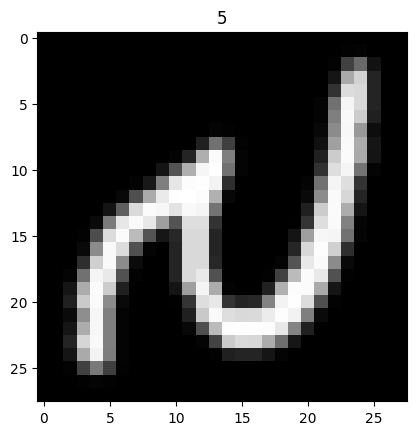

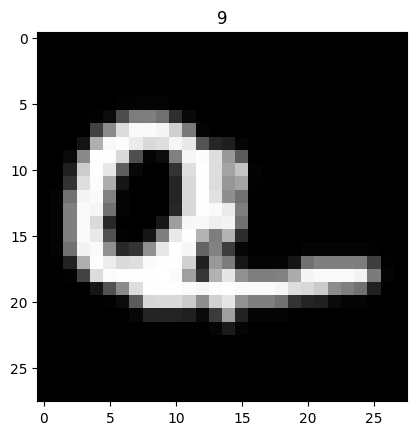

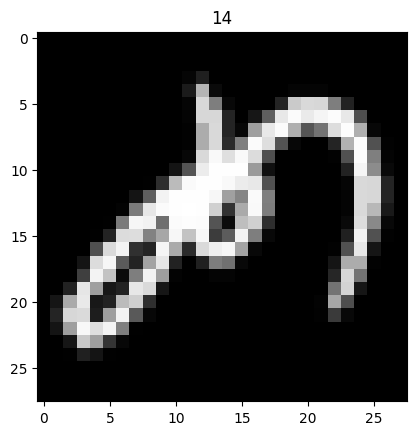

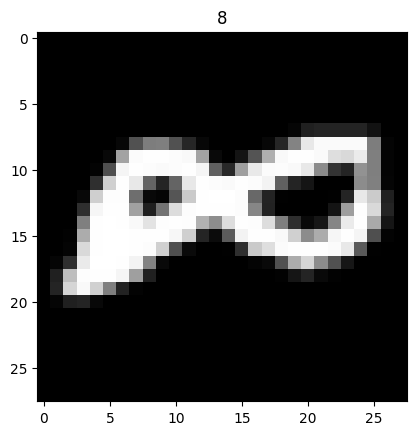

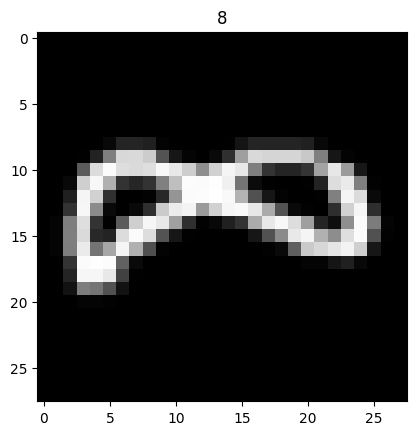

In [3]:
# Load some sample data from the dataset and visualize
import matplotlib.pyplot as plt

for image, label in train_data.take(5):
    plt.figure()
    plt.imshow(image.numpy().squeeze(), cmap=plt.cm.gray)
    plt.title(label.numpy())


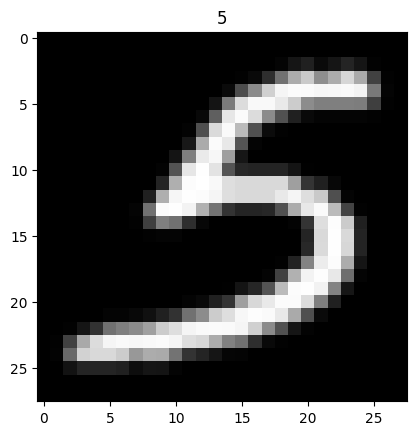

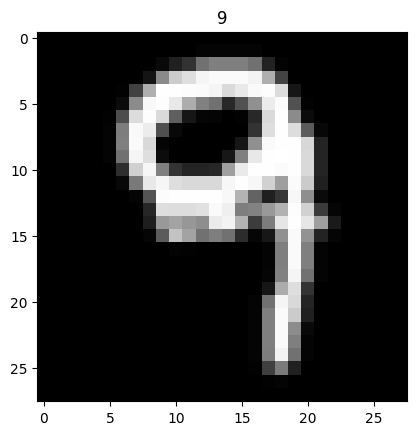

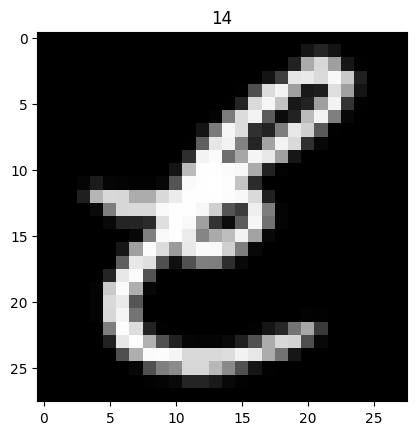

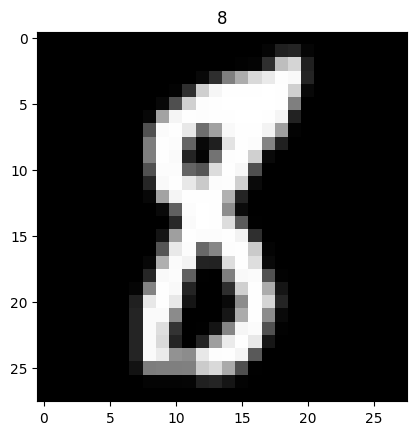

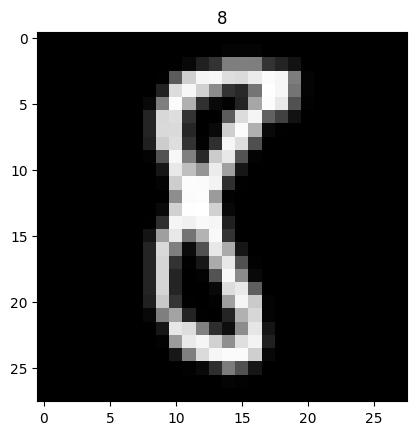

In [5]:
# fix orientation
import numpy as np

for image, label in train_data.take(5):
    # Correct the orientation
    image = np.rot90(image.numpy().squeeze(), -1)
    image = np.fliplr(image)

    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(label.numpy())

## Data Preprocessing
Before feeding images into our model, it's crucial to preprocess them to ensure our model trains efficiently and effectively.
![Discord Logo.jpg]()

### Normalization

In [14]:
# Access a batch of images and labels from train_data for visualization or processing
for images, labels in train_data.take(1):
    normalized_images = images.numpy() / 255.0

### Reshaping